# Artificial Neural Networks with Keras

* ANNs are at the very core of deep learning.

# A. From Biological to Artificial Neurons:

### A.1 Biological Neurons:

* A biological Neuron: <br>
&emsp; 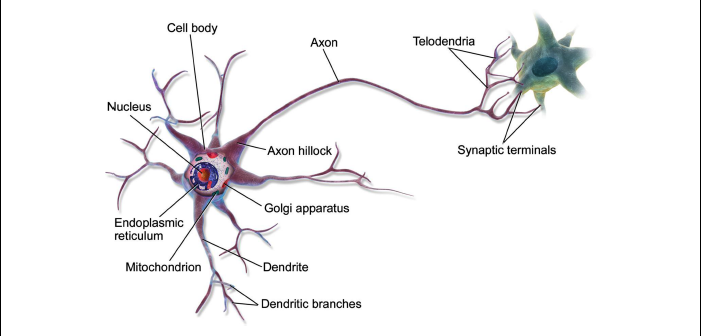

* Biological neurons produce short electrical impulses called *action potentials (APs, or just signals)*, which travel along the axons and make the synapses release chemical signals called *neurotransmitters*.
* When a neuron receives a sufficient amount of these neurotransmitters within a few milliseconds, it fires its own electrical impulses (but actually, it depends on the neurotransmitters, as some of them inhibit the neuron from firing).
* Highly complex computations can be performed by a network of fairly simple neurons, much like a complex anthill can emerge from the combined efforts of simple ants.
* The architecture of biological neural networks (BNNs) is the subject of active research, but some parts of the brain have been mapped. These efforts show that neurons are often organized in consecutive layers, especially in the cerebral cortex (the outer layer of the brain).

### A.2. Logical Computations w/ Neurons:

* Artificial neuron
    * It has one or more binary (on/off) inputs and one binary output.
    * The artificial neuron activates its output when more than a certain number of its inputs are active.
    * Such a simplified model it is possible to build a network of artificial neurons that can compute any logical proposition you want.

* ANNs performing simple logical Computations: <br>
&emsp; 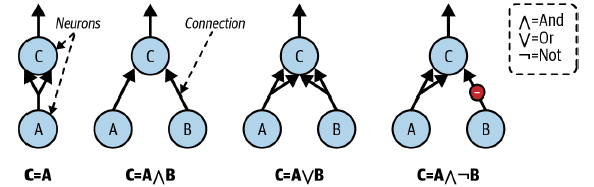
* $C\ =\ A$ : identity function, neuron C is activated if neuron A is activated, and v. versa.
* $C\ =\ A\ \wedge\ B$ : Logical AND, neuron is activated only when both neurons A and B are activated.
* $C\ =\ A\ \vee\ B$ : Logical OR, neuron C gets activated if either neuron A or neuron B is activated (or both).
* $C\ =\ A\ \wedge\ \rightharpoondown\ B$: Logical NOT, neuron C is activated only if neuron A is active and neuron B is off. If neuron A is active all the time, then you get a logical NOT: neuron C is active when neuron B is off, and vice versa.

### A.3. The Perceptron:

*  The perceptron is based on a slightly different artifical neuron called a *THRESHOLD LOGIC UNIT (TLU)* or *LINEAR THRESHOLD UNIT (LTU)*.
    * The inputs and outputs are numbers (instead of binary on/off values), and each input connection is associated w/ a weight.
    * The TLU first computes a linear function of its inputs: <br>
        &emsp; $z\ =\ w_1x_1\ +\ w_2x_2\ +...+\ w_nx_n\ +\ b\ =\ w^Tx+b$
    * Then the TLU applies a step function to the result:<br>
        &emsp; $h_w(x)\ =\ step(z)$ <br>
        &emsp; 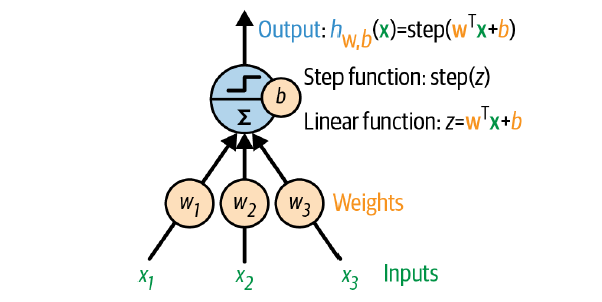

* Common step functions used in perceptrons (assuming threshold=0).
    * Heaviside Step Function: <br>
    &emsp; $heaviside(z) = \max \begin{dcases} \mathrm{0\ if\ z<0}  \\ \mathrm{1\ if\ z\geq0}  \\  \end{dcases}$
    * Sign Function: <br>
    &emsp; $sgn(z) = \max \begin{dcases} \mathrm{-1\ if\ z<0}  \\ \mathrm{0\ if\ z=0}  \\  \mathrm{+1\ if\ z>0}  \end{dcases}$

* A perceptron is composed of one or more TLUs organized in a single layer, where every TLU is connected to every input. Such a layer is called a fully connected layer, or a dense layer. The inputs constitute the input layer. And since the layer of TLUs produces the final outputs, it is called the output layer. <br>
&emsp; 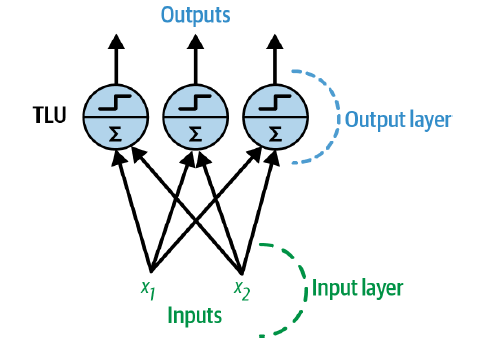
    * Computing the outputs of a fully connected layer: <br>
    &emsp; $h_{W,b}(X)\ =\ \phi(XW\ +\ b)$, where:
        * $X$ represents the matrix of input features. It has one row per instance and one column per feature.
        * $W$ is the weight matrix that contains all the connection weights. It has one row per input and once column per neuron.
        * $b$ is the bias vector that contains all the bias terms: one per neuron.
        * function $\phi$ is the ACTIVATION FUNCTION : when the artificial neurons are TLUs, it is a step function.

* How is a perceptron trained?
    * Hebb's Rule:
        * When a biological neuron triggers another neuron often, the connection between these two neurons grows stronger. The connection weight between two neurons tends to increase when they fire simultaneously.
    * Perceptrons are trained using a variant of Hebb's rule that takes into account the error made by the network when it makes a prediction. The perceptron learning rule reinforces connections that help reduce the error.
        * The perceptron is fed one training instances at a time, and for each instance it makes its predictions.
        * For every output neuron that produced the wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction.
        * Perceptron Learning Rule (Weight Update): <br>
        &emsp; $w_{i,j}^{(next\ step)}\ =\ w_{i,j}\ +\ \eta(y_j\ -\ \hat{y}_j)x_i $ , <br>where:
            * $w_{i,j}$ = connection weight between the $i^{th}$ input and the $j^{th}$ neuron.
            * $x_i$ = the $i^{th}$ input value of the current training instance.
            * $\hat{y}_j$ = target output of the $j^{th}$ output neuron for the current training instance.
            * $\eta$ = learning rate.

* `sklearn.linear_model.Perceptron` class
    * Equivalent to using an `SGDClassifier` w/ hyperparameters : 
        * `loss="perceptron", learning_rate="constant", eta0=1, penalty="None"`

* Perceptrons are incapable of solving some trivial problems , e.g., the exclusive OR (XOR) classification problem. But this can be eliminated by stacking multiple perceptrons. The resulting ANN is called a multilayer perceptron (MLP). 
    * XOR Classification problem and an MLP that solves it (right): <br>
    &emsp; 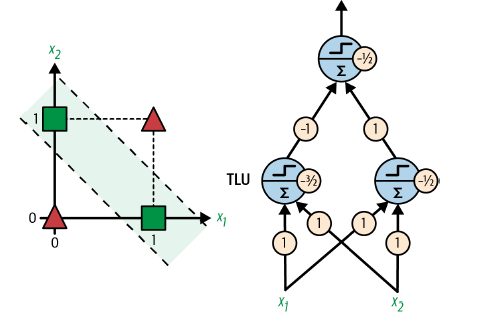

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # sample Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)
y_pred

array([ True, False])

### A.4. The Multilayer Perceptron and Backpropagation:
* An MLP is composed of one input layer, one or more layers of TLUs called hidden layers, and one final layer of TLUs called the output layer.
    * The layers close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers.
    * Example : Architecture of a multilayer perceptron w/ 2 inputs, 1 hidden layer of 4 neurons, and 3 output neurons. <br>
    &emsp; 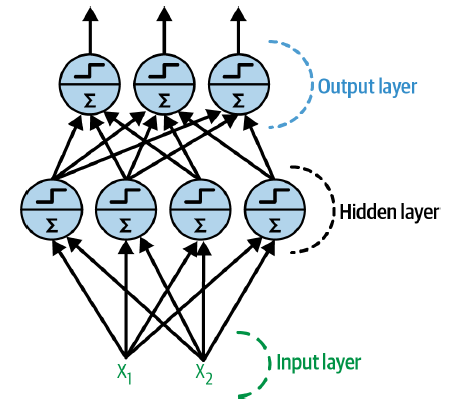
    * The signals flow only in one direction (from inputs to the outputs), so this architecture is an example of a *feedforward neural network (FNN)*.

* When an ANN contains deep stack of hidden layers, it is called a **deep neural network (DNN)**. 
    * The field of deep learning studies DNNs, and more generally it is interested in models containing deep stacks of computations.

* Backpropagation:
    * Is a training technique for neural networks that makes predictions for a mini-batch (forward pass), measures the error, then goes through each layer in reverse to measure the error contribution from each parameter(reverse pass) and finally tweaks the connection weights and biases  to reduce the error (gradient descent step):
    * More specifically:
        * It handles one mini-batch at a time (for example, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an epoch.
        * Each mini-batch enters the network through the input layer. The algorithm then computes the output of all the neurons in the first hidden layer, for every instance in the mini-batch. The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the forward pass: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.
        * Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).
        * Then it computes how much each output bias and each connection to the output layer contributed to the error. This is done analytically by applying the chain rule.
        * The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until it reaches the input layer. This reverse pass efficiently measures the error gradient across all the connection weights and biases in the network by propagating the error gradient backward through the network.
        * Finally, the algorithm performs a gradient descent step to tweak all the connection weights in the network, using the error gradients it just computed.

* It is important to initialized all the hidden layers' connnection weights randomly, or else training will fail.
    * For example, if you initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical. 
    * In other words, despite having hundreds of neurons per layer, your model will act as if it had only one neuron per layer: it won’t be too smart. If instead you randomly initialize the weights, you break the symmetry and allow backpropagation to train a diverse team of neurons.

* Activation Functions:
    * If there is no nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and that cannot solve very complex problems. Conversely, a large enough DNN w/ nonlinear activations can theoritically approximate any continuous function.
    * Common Activation Functions:
        * Sigmoid Function : $\sigma(z)\ =\Large\frac{1}{1 + \mathrm{exp}(-z)}$.
            * Has a well-defined nonzero derivative everywhere, allowing gradient descent to make some progress at every step.
        * Hyperbolic Tangent Function: $\mathrm{tanh}(z)\ =\ 2\sigma(2z)\ -\ 1 $
            * Just like the sigmoid function, this activation function is S-shaped, continuous, and differentiable, but its output value ranges from –1 to 1 (instead of 0 to 1 in the case of the sigmoid function). That range tends to make each layer’s output more or less centered around 0 at the beginning of training, which often helps speed up convergence.
        * Rectified Linear Unit Function: $\mathrm{ReLU}(z)\ =\ \mathrm{max}(0, z)$
            * ReLU function is continuous bet not differentiable at z=0, and its derivative is 0 for z <0. In practice, however, it works very well and has the advantage of being fast to compute, so it has become the default.

(-4.5, 4.5, -0.2, 1.2)

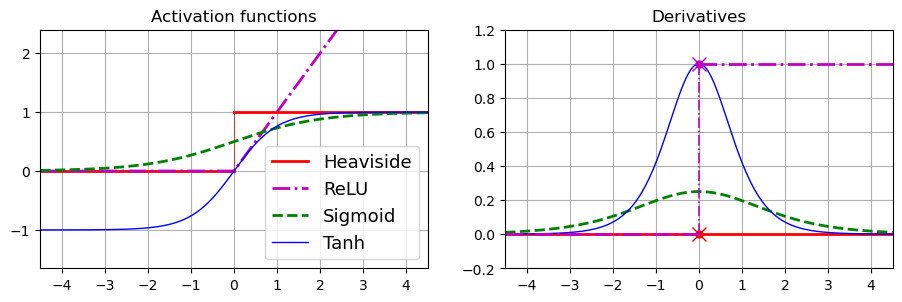

In [3]:
from scipy.special import expit as sigmoid
import matplotlib.pyplot as plt

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

### A.5. Regression MLPs:
* MLPs can be used for regression tasks.
    * To predict a single value, a single output neuron is needed: its output is the predicted value.
    * For multivariate regression, one output neuron per output dimension is needed. For example, to locate the center of an object in an image, you need to predict two coordinates, so you need 2 output neurons.

* `sklearn.neural_network.MLPRegressor`:
    * Scaling is important for MLPs because they are trained using gradient descent. 
        * Gradient Descent does not converge very well when the features have very different scales.
    * `MLPRegressor` does not support activation functions in the output layer.
    * Typical regression MLP Architecture: <br>
    &emsp;  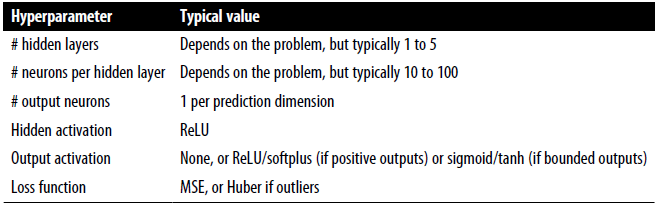

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [5]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

In [6]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

### A.6.Classification MLPs:

* MLPs can also be used for classification tasks.
    * For a binary classification problem, you just need a single output neuron using the sigmoid activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class. The estimated probability of the negative class is equal to one minus that number.
    * MLPs can also handle multilabel binary classification tasks.
        * For example, an email classification system that predicts whether each incoming email is ham or spam, and simultaneously predicts whether it is an urgent or nonurgent email. In this case, 2 output neurons will be needed, both using the sigmoid activation function: the 1st would output the probability that the email is spam, and the 2nd would output the probability that it is urgent. More generally, you would dedicate one output neuron for each positive class. The output probabilities do not necessarily add up to 1. This lets the model output any combination of labels (e.g., nonurgent ham, urgent ham, nonurgent spam, urgent spam).
    * If each instance can belong only to a single class, out of 3 or more possible classes (classes 0 to 9 for digit image classification), then you need to have one output neuron per class, and you should use the softmax activation function for the whole output layer.
        * The softmax function will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1, since the classes are exclusive.
    * Regarding the loss function, since we are predicting probability distributions, the cross-entropy loss is generally a good choice.
    
* `sklearn.neural_network.MLPClassifier`:
    * Minimizes the cross entropy rather than the MSE (`MLPRegressor`).
    * Typicaly classification MLP architecture: <br>
    &emsp; 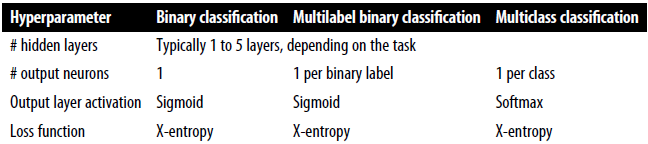

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

# B. Implementing MLPs with `Keras`:

### B.1. Building an Image Classifier Using the Sequential API

* `Sequential` model:
    * simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially

* `tf.keras.layers.Input`:
    * Keras needs to know the shape of the inputs so it can determine the shape of the connection weight matrix of the first hidden layer.

* `tf.keras.layers.Flatten`:
    * Convert each input into a 1D array. It receives input data X, it computes `X.reshape(-1, 784)`.
    * Doesn't have any parameters; Just for simple preprocessing.

* `tf.keras.layers.Dense`:
    * Each `Dense` layer manages its own matrix, containing all the connections weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes: <br>
        &emsp; $h_{W,b}(X)\ =\ \phi(XW\ +\ b)$

* Specifying `activation="relu"` is equivalent to specifying `activation=tf.keras.activations.relu`.
    * Other activation functions are available in the `tf.keras.activations` package.

* Each layer in the model must have a unique name, and the layer names can be set explicitly using the constructor's `name` argument.
    * Keras also handles this automatically.
    * Keras also ensures that the name is globally unique, even across models, by appending an index if needed. This makes it possible to merge models easily w/o getting name conflicts.
    * All global state managed by Keras is stored in a Keras session, w/c can be cleared using `tf.keras.backend.clear_session()`.

* All the parameters of a layer can be accessed using its `get_weights()` and `set_weights()` methods. For a `Dense` layer, this includes both the connection weights and the bias terms.
    * The `Dense` layer initializes the connections weight randomly and the biases were initialized to zeros.
    * To use  a different initialization method, set `kernel_initializer` or `bias_initializer` when creating the layer.
    * The shape of the weight matrix depends on the number of inputs.
    * If the `input_shape` is not specified, Keras will simply wait until it knows the input shape before it actually builds the model parameters.
        * This will happen during training, or when its `build()` method is called.
        * Until the model parameters are built, you will not be able to do certain things, such as display the model summary or save the model. So, if you know the input shape when creating the model, it is best to specify it.

* Compiling the model:
    * After a model is created, you must call its `compile()` method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation.
    * `loss="sparse_categorical_crossentropy"`:
        * equivalent of using `loss=tf.keras.losses.sparse_categorical_crossentropy`
        * for sparse labels (i.e., for each instance, there is just a target index) and the classes are exclusive.
        * For one target probability per class for each instance (such as one-hot bectors), `categorical_crossentropy` loss is much preferred.
        * For binary classifcation or multilable binary classifcation, use `sigmoid` activation function in the output layer instead of the `softmax` activation function, and then use the `binary_crossentropy` loss.
        * To convert sparse labels to one-hot vector labels, use `tf.keras.utils.to_categorical()` function. Use `np.argmax()` function w/ `axis=1` to go the other way around.
    * The optimizer, `"sgd"` means that we will train the model using stochastic gradient descent.
        * When using the SGD optimizer, it is important to tune the learning rate.
            * use `optimizer=tf.keras.optimizers.SGD(learning_rate=__???__)` to set the learning rate, rather than `optimizer="sgd"`, which defaults to a learning rate of `0.01`.
    
* Training and evaluating the model:
    * Pass the number of epochs to train so that the model will converge into a good solution.
    * At each epoch during training, Keras displays the number of mini-batches processed so far on the left side of the progress bar.
    * Instead of passing a validation set using the validation_data argument, you could set validation_split to the ratio of the training set that you want Keras to use for validation.
        * For example, `validation_split=0.1` tells Keras to use the last 10% of the data (before shuffling) for validation.
    * If the training set was very skewed, with some classes being overrepresented and others underrepresented, it would be useful to set the `class_weight` argument when calling the `fit()` method, to give a larger weight to underrepresented classes and a lower weight to overrepresented classes. These weights would be used by Keras when computing the loss.
    * If you need per-instance weights, set the `sample_weight` argument. If both `class_weight` and `sample_weight` are provided, then Keras multiplies them.
        * Per-instance weights could be useful, for example, if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former.
    * You can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the `validation_data` tuple.
    * The `fit()` method returns a History object containing the training parameters `(history.params)`, the list of epochs it went through `(history.epoch)`, and most importantly a dictionary `(history.history)` containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any).

    * `model.evaluate(X_test, y_test)`:
        * For evaluating the test set to estimate the generalization error

In [8]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [9]:
X_train.shape

(55000, 28, 28)

In [10]:
X_train.dtype

dtype('uint8')

In [11]:
# Scale the pixel intensities down to the 0-1 range by dividng 255.0
X_train, X_valid, X_test, = X_train/255., X_valid/255., X_test/255.

In [12]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Ankle boot'

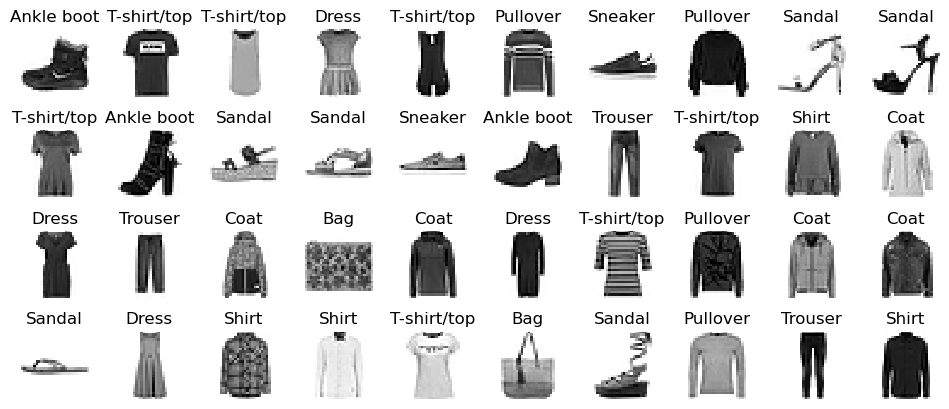

In [14]:
# Samples form the Fashion MNIST dataset
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [15]:
# Create the model using the sequential API
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax")) 

In [16]:
# Other way of implementing the Sequential model
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


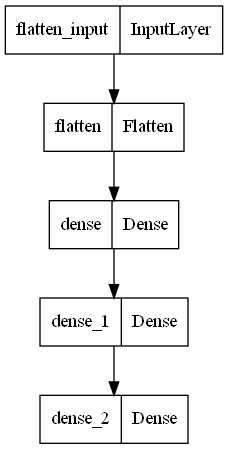

In [18]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [19]:
# Get the model's list of layers
model.layers

In [20]:
hidden1 = model.layers[1]
hidden1

In [21]:
hidden1.name

'dense'

In [23]:
model.get_layer('dense') is hidden1

True

In [24]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.00686013, -0.03489476, -0.00422184, ..., -0.0312527 ,
        -0.0056702 , -0.0658208 ],
       [-0.06577092, -0.0022725 , -0.05515364, ..., -0.03617376,
        -0.04442738,  0.04809748],
       [-0.02528026,  0.06200875,  0.02321377, ..., -0.06927136,
        -0.01297271,  0.0412199 ],
       ...,
       [-0.03670781,  0.05446522, -0.05717116, ..., -0.05449194,
        -0.00941144, -0.00212254],
       [ 0.05582142, -0.0102539 , -0.07393065, ...,  0.00106205,
        -0.02341475, -0.07134725],
       [ 0.05055647,  0.01860242, -0.02464625, ..., -0.01432623,
        -0.07378358, -0.01425866]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

In [28]:
# Compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [29]:
# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7240 - accuracy: 0.7657 - val_loss: 0.5035 - val_accuracy: 0.8272
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4852 - accuracy: 0.8316 - val_loss: 0.4545 - val_accuracy: 0.8348
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4389 - accuracy: 0.8452 - val_loss: 0.4171 - val_accuracy: 0.8516
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4138 - accuracy: 0.8556 - val_loss: 0.3924 - val_accuracy: 0.8604
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3926 - accuracy: 0.8629 - val_loss: 0.3909 - val_accuracy: 0.8598
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3770 - accuracy: 0.8680 - val_loss: 0.3943 - val_accuracy: 0.8638
Epoch 7/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3647 - accuracy: 0.8709 - val_loss: 0.3670 - val_accur

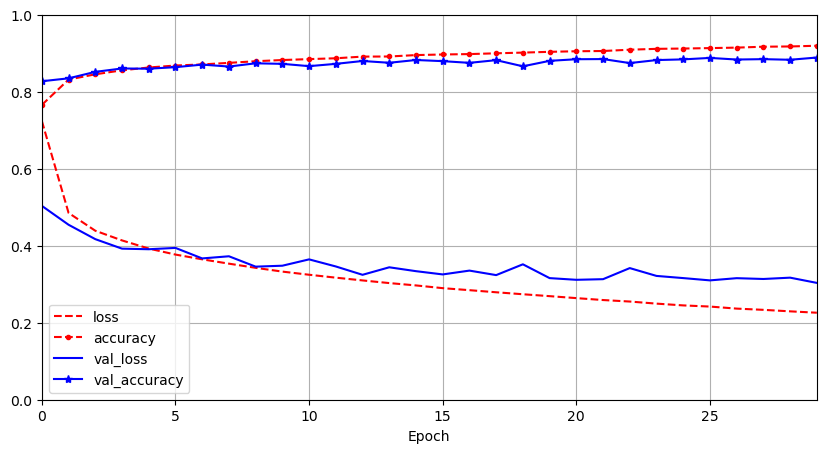

In [32]:
# Plot the learning curve
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(10, 5), 
    xlim=[0, 29], ylim=[0, 1],
    grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)

plt.show()

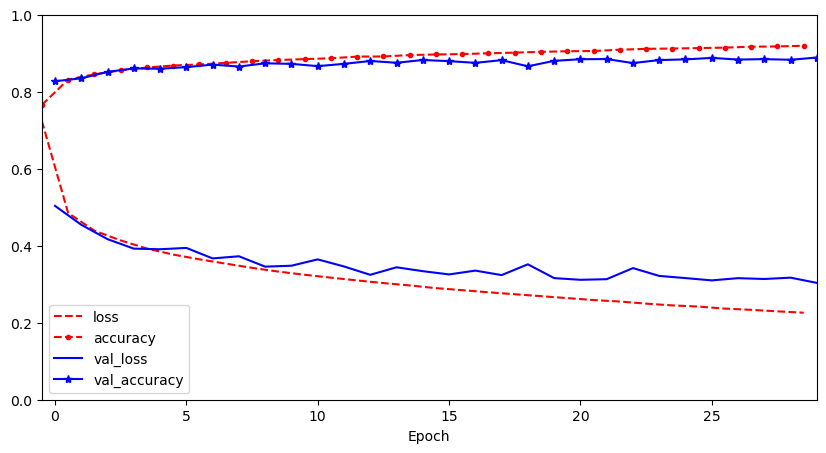

In [33]:
# shift the training curve by -1/2 epoch
plt.figure(figsize=(10, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")

In [34]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [51]:
for k, v in history.history.items():
    print(k, v[-1])


loss 0.2259790003299713
accuracy 0.9194363355636597
val_loss 0.3034409284591675
val_accuracy 0.8888000249862671


In [35]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3252 - accuracy: 0.8846


[0.32515212893486023, 0.8845999836921692]